# Data Collection Code

In [1]:
import serial
import serial.tools.list_ports

available_ports = [port.name for port in serial.tools.list_ports.comports()]
print(available_ports)

['COM3']


In [31]:
PORT = 'COM3'

def avg_n_samples(port=PORT, n=10, reading=0, verbose=False):
    with serial.Serial(port, baudrate=9600, timeout=10) as ser:
        avg = 0
        ser.flush()

        for i in range(n):
            line = ser.readline()
            raw_readings = [int(float(reading)) for reading in line.decode().split()]
            avg += raw_readings[reading]

            if verbose and i % 10 == 0:
                print(f"Reading {i}: {raw_readings[reading]}")

        return avg / n

In [38]:
sample = avg_n_samples(PORT, 100, 1, verbose=True)
print(f"Sample: {sample}")


Reading 0: 149122
Reading 10: 149110
Reading 20: 149088
Reading 30: 149076
Reading 40: 149192
Reading 50: 149019
Reading 60: 149137
Reading 70: 149125
Reading 80: 149140
Reading 90: 149143
Sample: 149112.11


# Load Cell 1 Data

In [58]:
# Map calibrated weight (kg) to raw output (unitless) 
data = {
    0.00: -15.61,
    0.2498: 52245.06, 
    0.5121: 107138.7,
    0.7124: 149112.11,
    1.00: 209703.29,
    2.00: 419665.39,
    3.00: 629105.21,
}

G = 9.81
forces = [weight * G for weight in data]
readings = [data[weight] for weight in data]

In [59]:
import numpy as np

m, b = np.polyfit(readings, forces, 1)
print(f"m = {m}, b = {b}")

m = 4.676078966403625e-05, b = 0.0072670826658988155


# Conclusion

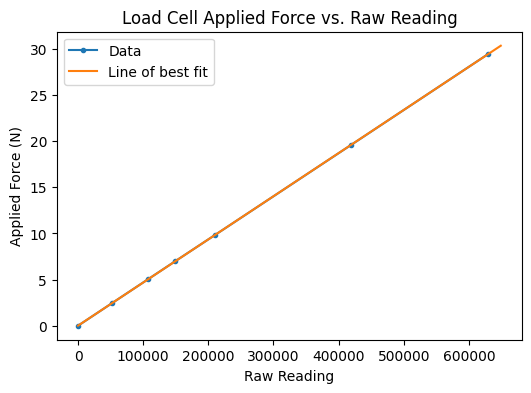

In [63]:
import matplotlib.pyplot as plt

best_fit_readings = np.arange(0, 650_000, 1000) 

plt.figure(figsize=(6,4))
plt.title("Load Cell Applied Force vs. Raw Reading")
plt.xlabel("Raw Reading")
plt.ylabel("Applied Force (N)")
plt.plot(readings, forces, marker=".", label="Data")
plt.plot(best_fit_readings, best_fit_readings*m+b, label=f"Line of best fit")
plt.legend()

In [61]:
scale = 4.6761e-5
offset = 0.0072671